# Field correlations in Atom-Cavity systems
based on a discussion from QuTiP list, and Rebic et al. PRA **69**, 035804 (2004)

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Earlier versions* match qutip list discussion, this has been modified to match PRA 69, 035804
# *see github
N=25

taus=np.linspace(0,10,500)

a=tensor(identity(2), destroy(N))
sm=tensor(sigmam(),identity(N))
sz=tensor(sigmaz(),identity(N))

In [42]:
kappa = 1
g = 6*kappa
theta = g
Ep = 0.1*kappa
gamma = 0.1*kappa

Hint = theta*(0.5*sz + a.dag()*a) + 1j*g*(a.dag()*sm - a*sm.dag())
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a, np.sqrt(gamma)*sm]

rho0=tensor(fock_dm(2,0),fock_dm(N,0))

In [24]:
n_op = a.dag()*a
solution = mesolve(H,rho0,taus, c_ops, [n_op])
n = solution.expect[0]

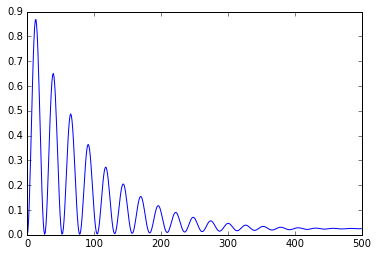

In [25]:
plt.plot(n)

In [26]:
# 1st order correlation:
# pass None as state so it solves for steady state
corr1 = correlation_2op_1t(H, None, taus, c_ops, a.dag(), a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


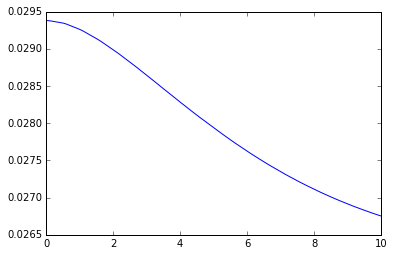

In [32]:
plt.plot(taus,corr1)

In [28]:
# Could also just use this:
g1 = coherence_function_g1(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


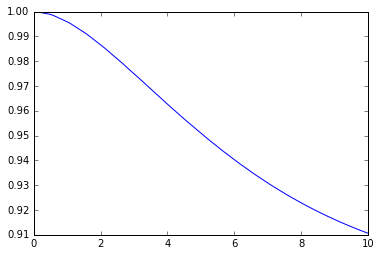

In [33]:
plt.plot(taus,g1)

In [30]:
# 2nd order correlation
# again, pass None so it solves for steady state
corr2 = correlation_3op_1t(H, None, taus, c_ops, a.dag(), a.dag()*a, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


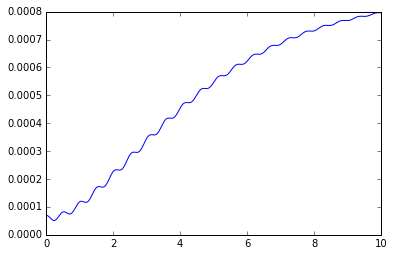

In [34]:
plt.plot(taus,corr2)

In [43]:
# Or just use this:
g2_weak = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


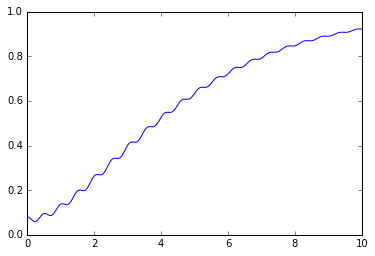

In [44]:
plt.plot(taus,g2_weak)

The two curves they show are for different values of g and pump, try that here:

In [45]:
kappa = 1
g = 20*kappa
theta = g
Ep = 0.5*kappa
gamma = 0.1*kappa

Hint = theta*(0.5*sz + a.dag()*a) + 1j*g*(a.dag()*sm - a*sm.dag())
Hpump = 1j*Ep*(a - a.dag())
H = Hint + Hpump

c_ops = [np.sqrt(kappa)*a, np.sqrt(gamma)*sm]

rho0=tensor(fock_dm(2,0),fock_dm(N,0))

In [46]:
g2_strong = coherence_function_g2(H, taus, c_ops, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


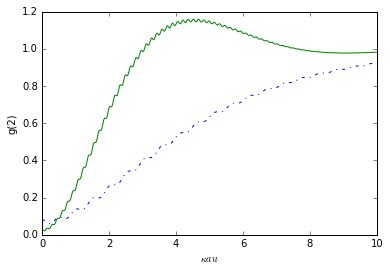

In [58]:
plt.plot(taus,g2_weak,"-.")
plt.plot(taus,g2_strong)
plt.xlabel("$\kappa\tau$")
plt.ylabel("g(2)")

Sweet! Pretty nice agreement here!

In [51]:
qutip.__version__

'3.1.0'

In [54]:
import sys
print(sys.version)

3.5.0 |Anaconda custom (x86_64)| (default, Oct 20 2015, 14:39:26) 
[GCC 4.2.1 (Apple Inc. build 5577)]


Next, look at the other model (EIT Kerr) and compare.